<h1> Diabetes Diagnosis Predictor Project Made in JupyterNotebook</h1>
<h2> By: Tuan Huynh</h2>
<h2> The Data Set That I Will Be Working On Is From Kaggle:</h2>
(<a href="https://www.kaggle.com/datasets/whenamancodes/predict-diabities/data">(Predict Diabetes: By Aman Chauhan
</)
)

<h1> Objectives:</h1>
The objective of this project is to predict the possibility of a patient developing diabetes based on a set of categorical factors. Using a dataset provided by Kaggle, I will explore the data, preprocess it, apply a predictive machine learning model to build an accurate (80%) prediction system. The goal is to not only demonstrate the predictive model but also showcase various forms of data visualization including heatmaps, boxplots, scatter plots, and distribution plots.

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [29]:
files = os.listdir ("/home/86ebc3a3-3e04-44ba-bece-18b6f3c70756/.cache/kagglehub/datasets/whenamancodes/predict-diabities/versions/1")
print(files)


['diabetes.csv']


In [7]:
excel_path = r"Tuan_KaggleDiabetesProject/Tuan_diabetes.csv"
df = pd.read_csv (r"Tuan_KaggleDiabetesProject/Tuan_diabetes.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<h1>The Heatmap Visualization</h1>

Shows a positive correlation between pregnancy and age

<Axes: >

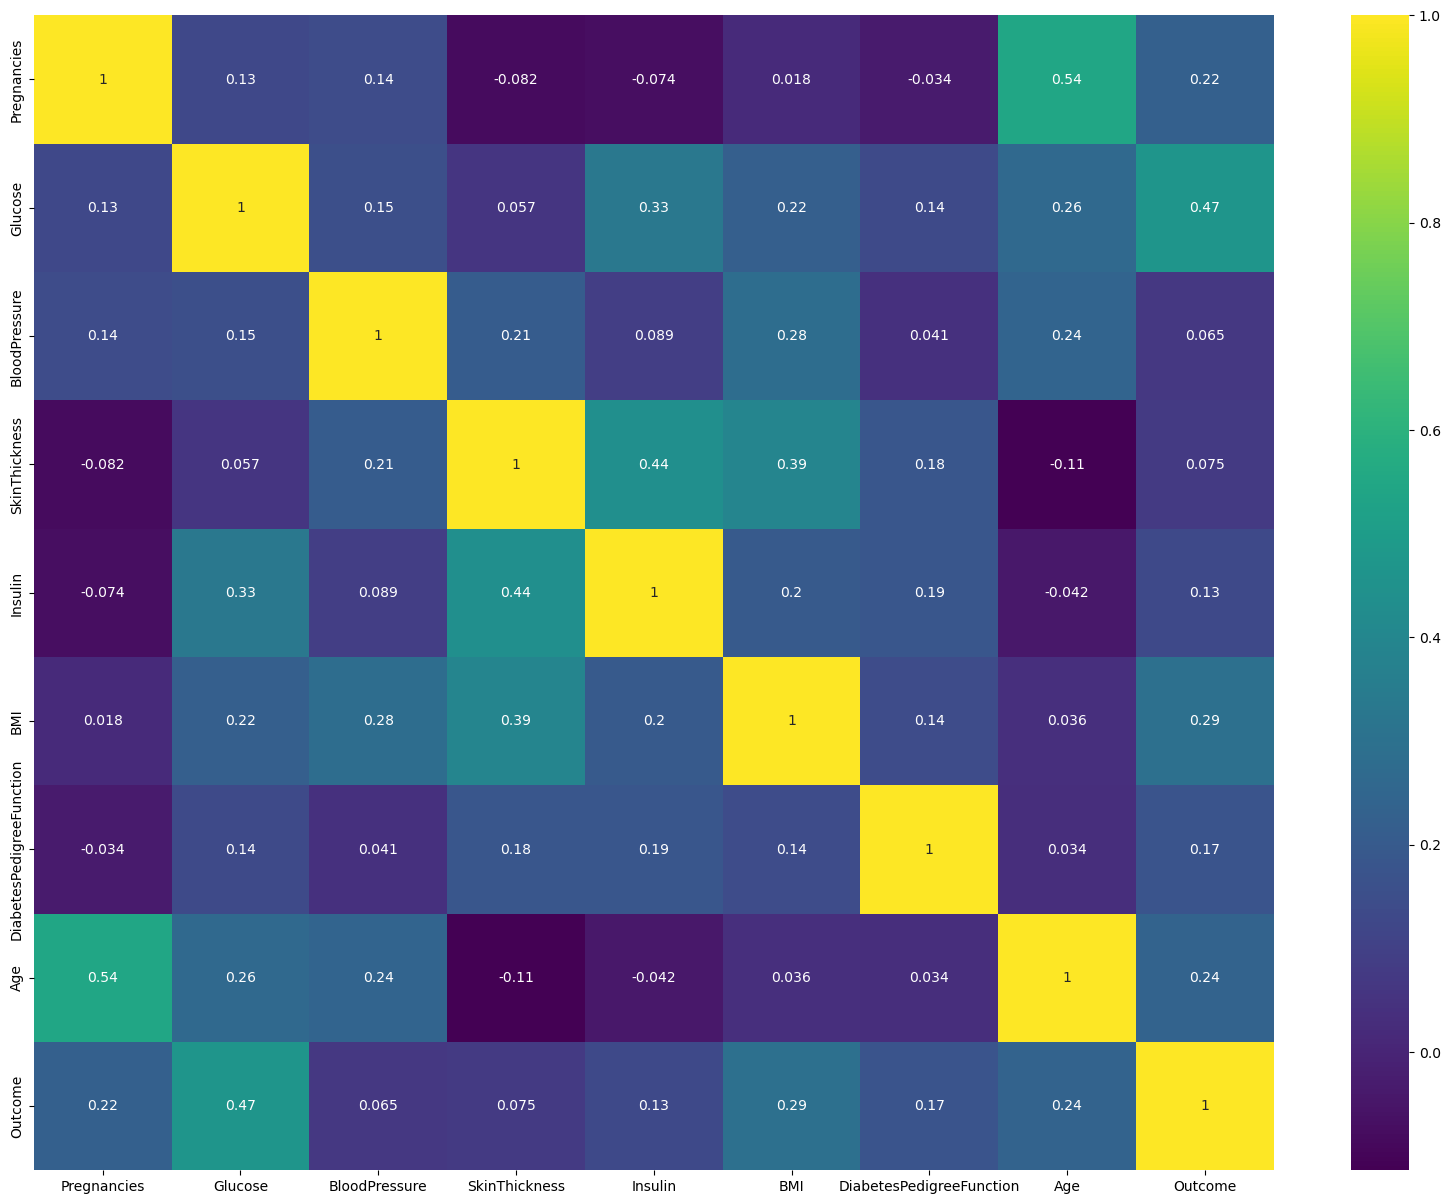

In [20]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="viridis")

In [10]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<h1>The Boxplot Visualization</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

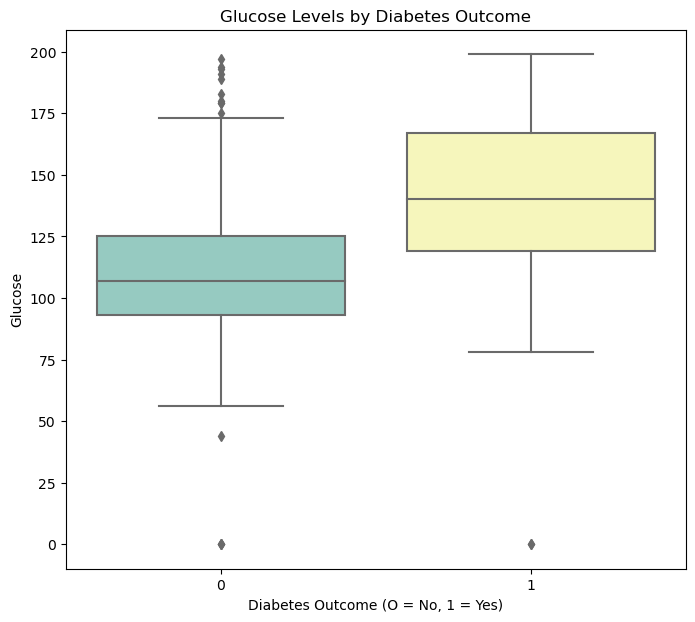

In [11]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Outcome',y='Glucose', data=df, palette='Set3')
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (O = No, 1 = Yes)')
plt.ylabel('Glucose') 
plt.show

<h1>The Distribution Plot Visualization</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

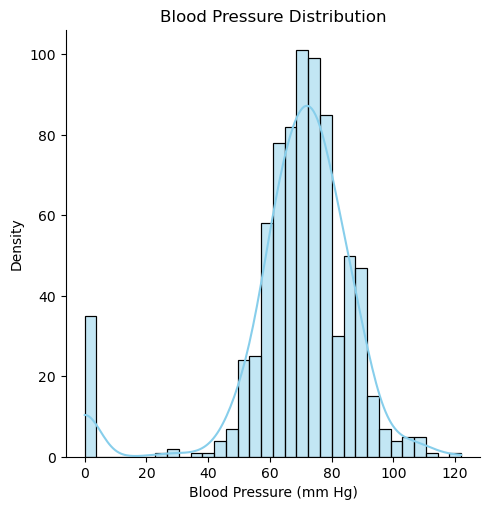

In [42]:
sns.displot(df['BloodPressure'], kde=True, color='skyblue')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Density')
plt.show

<h1>The Scatterplot Visualization</h1>

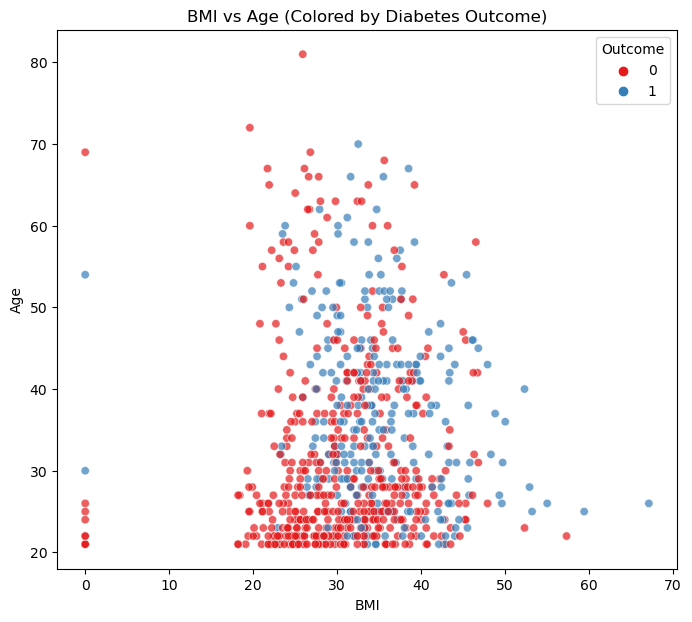

In [12]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df, palette='Set1', alpha=0.7)
plt.title('BMI vs Age (Colored by Diabetes Outcome)')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

<h1>I will Create A Prediction Model Below:</h1>

In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Will use RandomForestClassifier for the prediction model
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=0)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182


<h1>Now, We Will Predict A Random New Patient To Test Out The Model</h1>
<h2> Patient Test Example:</h2>

In [45]:
new_patient = pd.DataFrame([{
    'Pregnancies': 7,
    'Glucose': 110,
    'BloodPressure': 90,
    'SkinThickness': 45,
    'Insulin': 160,
    'BMI': 33.5,
    'DiabetesPedigreeFunction': 1.5,
    'Age': 45,
}])

prediction = model.predict(new_patient)
print("Diabetes Prediction:", "Yes" if prediction[0] == 1 else "No")

Diabetes Prediction: Yes
